In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [1]:
ruta = './data/clean/'

In [2]:
ruta

'./data/clean/'

# Estadisticas descriptivas

In [23]:
df_med_prin = pd.read_csv(ruta+"med_principal_clean.csv", encoding="utf-8")

In [24]:
df_var_clim = pd.read_csv(ruta+"data_met_edif_lit_clean.csv", encoding="utf-8")

In [25]:
df_med_prin = df_med_prin.loc[:,['tiempo', 'energia_activa']]

In [26]:
df_med_prin

tiempo  energia_activa
0       2017-01-01 00:00:00           205.8
1       2017-01-01 00:15:00           205.8
2       2017-01-01 00:30:00           210.0
3       2017-01-01 00:45:00           205.8
4       2017-01-01 01:00:00           205.8
...                     ...             ...
136892  2020-12-17 23:00:00           184.8
136893  2020-12-17 23:15:00           189.0
136894  2020-12-17 23:30:00           189.0
136895  2020-12-17 23:45:00           184.8
136896  2020-12-18 00:00:00           184.8

[136897 rows x 2 columns]

In [27]:
df_med_prin.describe()

energia_activa
count   136897.000000
mean       360.471749
std        255.620156
min          0.000000
25%        201.600000
50%        226.800000
75%        415.800000
max       1260.000000

In [28]:
df_med_prin.dtypes

tiempo             object
energia_activa    float64
dtype: object

In [29]:
df_var_clim.dtypes

tiempo               object
TempCelcius         float64
HR                  float64
Lluviamm            float64
Dirdelviento        float64
Veldelviento_m/s    float64
Velderafagas_m/s    float64
dtype: object

In [30]:
df_var_clim.head()

tiempo  TempCelcius    HR  Lluviamm  Dirdelviento  \
0  2016-01-21 02:00:00       25.817  87.9       0.0         146.0   
1  2016-01-21 02:10:00       25.671  88.3       0.0         181.1   
2  2016-01-21 02:20:00       25.623  88.7       0.0         164.3   
3  2016-01-21 02:30:00       25.623  88.9       0.0         181.1   
4  2016-01-21 02:40:00       25.598  89.1       0.0         151.6   

   Veldelviento_m/s  Velderafagas_m/s  
0           -888.88           -888.88  
1           -888.88           -888.88  
2           -888.88           -888.88  
3           -888.88           -888.88  
4           -888.88           -888.88

## Agrupamiento y graficas de la data

1. Por Hora, Consumo por la suma por hora, variable climatica la media

In [31]:
df_var_clim.dtypes

tiempo               object
TempCelcius         float64
HR                  float64
Lluviamm            float64
Dirdelviento        float64
Veldelviento_m/s    float64
Velderafagas_m/s    float64
dtype: object

In [32]:
df_med_prin.dtypes

tiempo             object
energia_activa    float64
dtype: object

In [33]:
df_var_clim['tiempo'] = pd.to_datetime(df_var_clim['tiempo'])

In [34]:
df_var_clim.dtypes

tiempo              datetime64[ns]
TempCelcius                float64
HR                         float64
Lluviamm                   float64
Dirdelviento               float64
Veldelviento_m/s           float64
Velderafagas_m/s           float64
dtype: object

In [35]:
df_med_prin['tiempo'] = pd.to_datetime(df_med_prin['tiempo'])

In [36]:
df_med_prin.dtypes

tiempo            datetime64[ns]
energia_activa           float64
dtype: object

In [37]:
lista_columnas = df_med_prin.columns

In [38]:
lista_comum_clima = df_var_clim.columns

In [39]:
lista_columnas

Index(['tiempo', 'energia_activa'], dtype='object')

In [40]:
frecuencia_agrupamieto = 'H'

In [41]:
frecuencia_agrupamieto

'H'

In [42]:
df_med_prin_agrupado=df_med_prin.groupby(pd.Grouper(key='tiempo', freq=frecuencia_agrupamieto))[lista_columnas].sum().reset_index()

In [43]:
df_var_clim_agrupado=df_var_clim.groupby(pd.Grouper(key='tiempo', freq=frecuencia_agrupamieto))[lista_comum_clima].mean().reset_index()

In [44]:
df_med_prin_agrupado

tiempo  energia_activa
0     2017-01-01 00:00:00           827.4
1     2017-01-01 01:00:00           814.8
2     2017-01-01 02:00:00           798.0
3     2017-01-01 03:00:00           802.2
4     2017-01-01 04:00:00           793.8
...                   ...             ...
34724 2020-12-17 20:00:00           806.4
34725 2020-12-17 21:00:00           768.6
34726 2020-12-17 22:00:00           760.2
34727 2020-12-17 23:00:00           747.6
34728 2020-12-18 00:00:00           184.8

[34729 rows x 2 columns]

In [45]:
df_var_clim_agrupado

tiempo  TempCelcius         HR  Lluviamm  Dirdelviento  \
0     2016-01-21 02:00:00    25.642833  88.700000       0.0    171.283333   
1     2016-01-21 03:00:00    25.452667  90.183333       0.0    180.883333   
2     2016-01-21 04:00:00    25.020500  91.533333       0.0    186.933333   
3     2016-01-21 05:00:00    24.222833  93.550000       0.0    193.266667   
4     2016-01-21 06:00:00    24.231000  94.416667       0.0    191.650000   
...                   ...          ...        ...       ...           ...   
39580 2020-07-27 06:00:00    20.646333  93.816667       0.0    205.433333   
39581 2020-07-27 07:00:00    21.151167  92.733333       0.0    205.233333   
39582 2020-07-27 08:00:00    22.429667  89.766667       0.0    183.916667   
39583 2020-07-27 09:00:00    23.336333  86.366667       0.0    173.833333   
39584 2020-07-27 10:00:00    24.219000  85.200000       0.0    127.800000   

       Veldelviento_m/s  Velderafagas_m/s  
0           -888.880000       -888.880000  
1           -888.880000       -888.880000  
2           -888.880000       -888.880000  
3           -888.880000       -888.880000  
4           -888.880000       -888.880000  
...                 ...               ...  
39580          0.250000          2.015000  
39581          0.416667          2.351667  
39582          0.883333          3.063333  
39583          1.051667          3.146667  
39584          0.500000          2.010000  

[39585 rows x 7 columns]

In [46]:
x_med_min=df_med_prin_agrupado['tiempo'].min()

In [47]:
x_med_min

Timestamp('2017-01-01 00:00:00')

In [48]:
x_med_max=df_med_prin_agrupado['tiempo'].max()

In [49]:
x_med_max

Timestamp('2020-12-18 00:00:00')

In [50]:
x_clim_min =df_var_clim_agrupado['tiempo'].min()

In [51]:
x_clim_min

Timestamp('2016-01-21 02:00:00')

In [52]:
x_clim_max = df_var_clim_agrupado['tiempo'].max()

In [53]:
x_clim_max

Timestamp('2020-07-27 10:00:00')

In [54]:
x_min = [x_med_min, x_clim_min]

In [55]:
max(x_min)

Timestamp('2017-01-01 00:00:00')

In [56]:
x_med_min = [x_med_max, x_clim_max]

In [57]:
min(x_med_min)

Timestamp('2020-07-27 10:00:00')

In [58]:
df1= df_med_prin_agrupado[(df_med_prin_agrupado['tiempo'] >= max(x_min)) & (df_med_prin_agrupado['tiempo'] <= min(x_med_min))]

In [59]:
df2 = df_var_clim_agrupado[(df_var_clim_agrupado['tiempo'] >= max(x_min)) & (df_var_clim_agrupado['tiempo'] <= min(x_med_min))]

In [60]:
df_total = df1.join(df2.set_index('tiempo'), on='tiempo')

In [61]:
df_total.to_csv(ruta+'dataset_consumo_clima.csv',index=False)

In [62]:
df_total = df_total.set_index("tiempo")# create new columns from datetime index
#df_total["year"] = df_total.index.year
df_total["month"] = df_total.index.month# new dataframe
df_total["day"] = df_total.index.day# new day
df_total["hour"] = df_total.index.hour# new day

In [64]:
df_total.tail(5)

energia_activa  TempCelcius         HR  Lluviamm  \
tiempo                                                                  
2020-07-27 06:00:00           638.4    20.646333  93.816667       0.0   
2020-07-27 07:00:00           709.8    21.151167  92.733333       0.0   
2020-07-27 08:00:00           856.8    22.429667  89.766667       0.0   
2020-07-27 09:00:00           978.6    23.336333  86.366667       0.0   
2020-07-27 10:00:00           982.8    24.219000  85.200000       0.0   

                     Dirdelviento  Veldelviento_m/s  Velderafagas_m/s  year  \
tiempo                                                                        
2020-07-27 06:00:00    205.433333          0.250000          2.015000  2020   
2020-07-27 07:00:00    205.233333          0.416667          2.351667  2020   
2020-07-27 08:00:00    183.916667          0.883333          3.063333  2020   
2020-07-27 09:00:00    173.833333          1.051667          3.146667  2020   
2020-07-27 10:00:00    127.800000          0.500000          2.010000  2020   

                     month  day  hour  
tiempo                                 
2020-07-27 06:00:00      7   27     6  
2020-07-27 07:00:00      7   27     7  
2020-07-27 08:00:00      7   27     8  
2020-07-27 09:00:00      7   27     9  
2020-07-27 10:00:00      7   27    10

In [44]:
from datetime import datetime

In [45]:
df_total = df_total.reset_index()

In [46]:
df_total.loc[0,'tiempo'].weekday()

6

Integer Value
	

Day of the week

0 Monday

1 Tuesday

2 Wednesday

3 Thursday

4 Friday

5 Saturday

6 Sunday

In [47]:
def dayNameFromWeekday(weekday):
    if weekday == 0:
        return "Monday"
    if weekday == 1:
        return "Tuesday"
    if weekday == 2:
        return "Wednesday"
    if weekday == 3:
        return "Thursday"
    if weekday == 4:
        return "Friday"
    if weekday == 5:
        return "Saturday"
    if weekday == 6:
        return "Sunday"


In [48]:
dayNameFromWeekday(0)

'Monday'

In [49]:
df_total['weekday'] = df_total.apply(lambda row : row['tiempo'].weekday(), axis=1)

In [50]:
df_total.to_csv(ruta+'dataset_consumo_clima.csv',index=False)

In [51]:
df_total

tiempo  energia_activa  energia_activa_sin_factor  \
0     2017-01-01 00:00:00           827.4                      0.197   
1     2017-01-01 01:00:00           814.8                      0.194   
2     2017-01-01 02:00:00           798.0                      0.190   
3     2017-01-01 03:00:00           802.2                      0.191   
4     2017-01-01 04:00:00           793.8                      0.189   
...                   ...             ...                        ...   
31278 2020-07-27 06:00:00           638.4                      0.152   
31279 2020-07-27 07:00:00           709.8                      0.169   
31280 2020-07-27 08:00:00           856.8                      0.204   
31281 2020-07-27 09:00:00           978.6                      0.233   
31282 2020-07-27 10:00:00           982.8                      0.234   

       energia_rectiva  energia_rectiva_sin_factor  demanda_activa  \
0                352.8                       0.084          3309.6   
1                348.6                       0.083          3259.2   
2                361.2                       0.086          3192.0   
3                378.0                       0.090          3208.8   
4                386.4                       0.092          3175.2   
...                ...                         ...             ...   
31278            457.8                       0.109          2553.6   
31279            512.4                       0.122          2839.2   
31280            474.6                       0.113          3427.2   
31281            462.0                       0.110          3914.4   
31282            449.4                       0.107          3931.2   

       demanda_reactiva  TempCelcius         HR  Lluviamm  Dirdelviento  \
0                1411.2    25.881833  80.133333       0.0    203.100000   
1                1394.4    25.748167  80.750000       0.0    188.816667   
2                1444.8    25.800667  77.250000       0.0    156.300000   
3                1512.0    25.715500  76.050000       0.0    157.950000   
4                1545.6    25.525500  77.200000       0.0    202.616667   
...                 ...          ...        ...       ...           ...   
31278            1831.2    20.646333  93.816667       0.0    205.433333   
31279            2049.6    21.151167  92.733333       0.0    205.233333   
31280            1898.4    22.429667  89.766667       0.0    183.916667   
31281            1848.0    23.336333  86.366667       0.0    173.833333   
31282            1797.6    24.219000  85.200000       0.0    127.800000   

       Veldelviento_m/s  Velderafagas_m/s  year  month  day  hour  weekday  
0           -888.880000       -888.880000  2017      1    1     0        6  
1           -888.880000       -888.880000  2017      1    1     1        6  
2           -888.880000       -888.880000  2017      1    1     2        6  
3           -888.880000       -888.880000  2017      1    1     3        6  
4           -888.880000       -888.880000  2017      1    1     4        6  
...                 ...               ...   ...    ...  ...   ...      ...  
31278          0.250000          2.015000  2020      7   27     6        0  
31279          0.416667          2.351667  2020      7   27     7        0  
31280          0.883333          3.063333  2020      7   27     8        0  
31281          1.051667          3.146667  2020      7   27     9        0  
31282          0.500000          2.010000  2020      7   27    10        0  

[31283 rows x 18 columns]

In [52]:
lista_columnas_1 = ['energia_activa', 'TempCelcius', 'HR']

In [53]:
frecuencia_agrupamieto = 'M'

In [54]:
df_total_agrupado=df_total.groupby(pd.Grouper(key='tiempo', freq=frecuencia_agrupamieto))[lista_columnas_1].mean().reset_index()

In [55]:
df_total_agrupado.head(5)

tiempo  energia_activa  TempCelcius         HR
0 2017-01-31     1772.992742    26.704277  81.649238
1 2017-02-28     1620.275000    27.008752  86.328175
2 2017-03-31     1525.638710    26.994235  87.470699
3 2017-04-30     1393.431667    27.383204  84.114537
4 2017-05-31     1803.945161    27.054170  83.795139

<AxesSubplot:xlabel='tiempo', ylabel='energia_activa'>

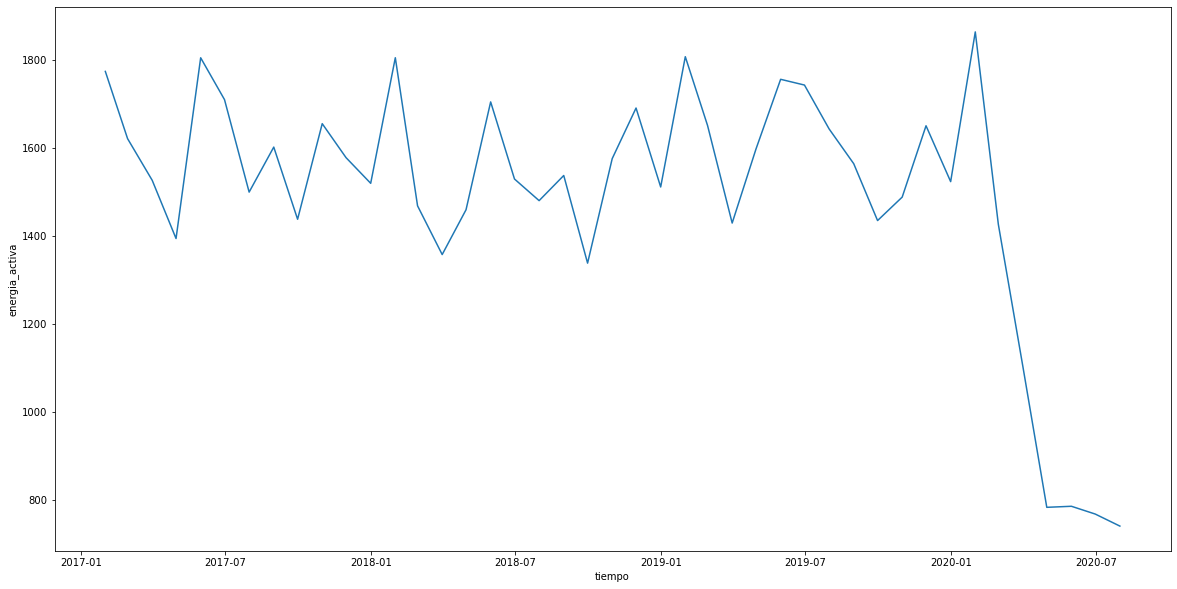

In [56]:
fig, axs = plt.subplots(figsize=(20,10))
sns.lineplot(data=df_total_agrupado , x='tiempo', y='energia_activa')

<AxesSubplot:xlabel='tiempo', ylabel='TempCelcius'>

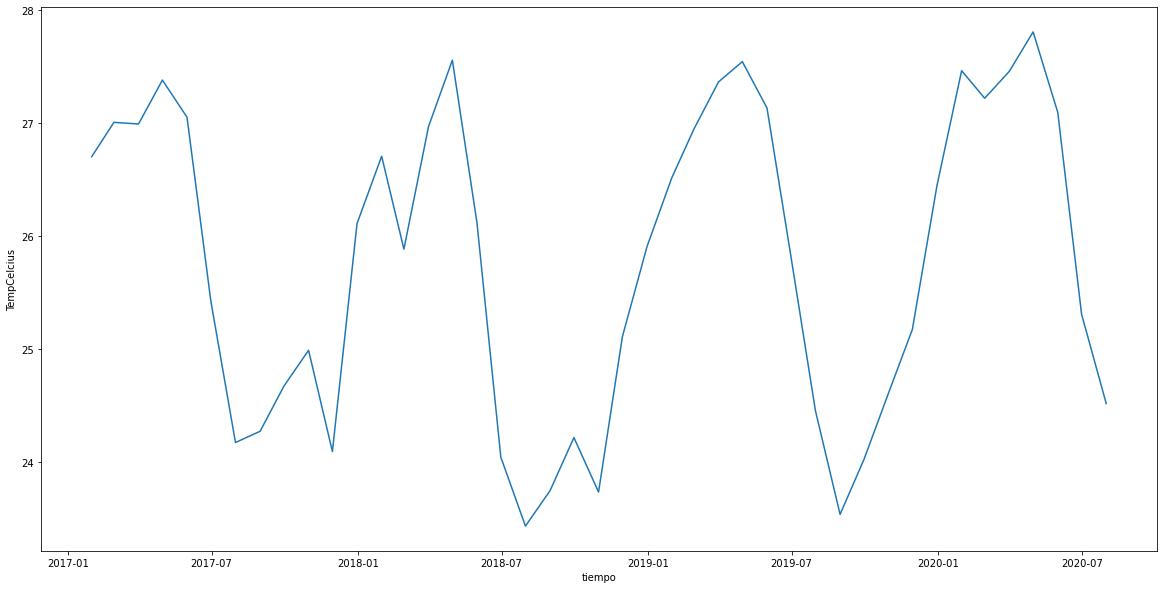

In [57]:
fig, axs = plt.subplots(figsize=(20,10))
sns.lineplot(data=df_total_agrupado , x='tiempo', y='TempCelcius')

<AxesSubplot:xlabel='tiempo', ylabel='HR'>

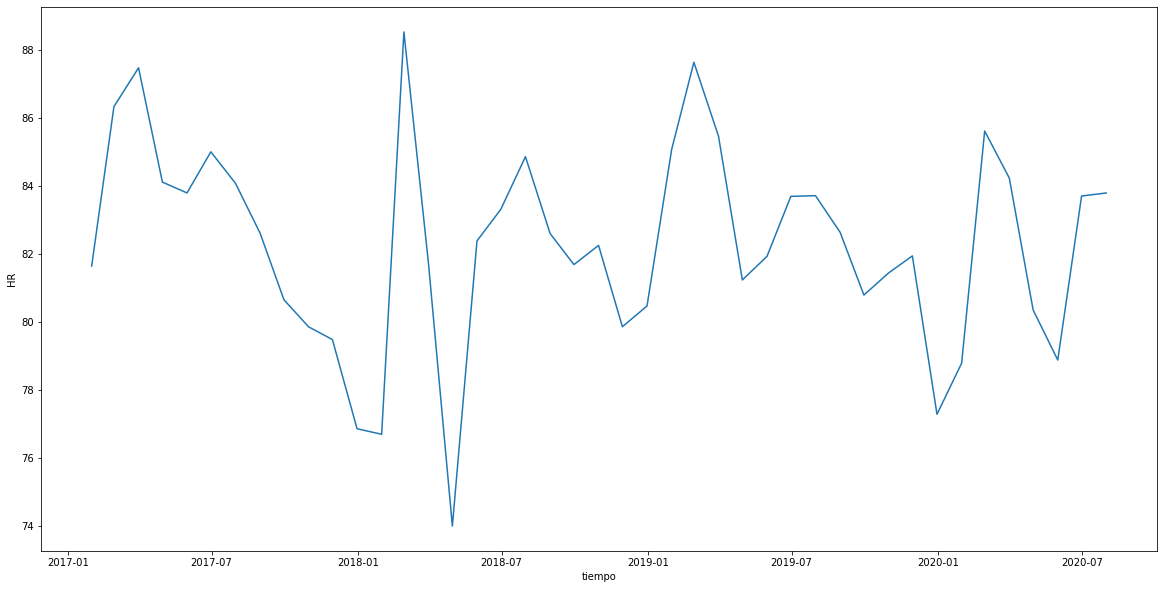

In [58]:
fig, axs = plt.subplots(figsize=(20,10))
sns.lineplot(data=df_total_agrupado , x='tiempo', y='HR')


# Boxplots y Correlación entre consumo y Variables Climáticas

In [59]:
df_total.loc[:,'energia_activa'][df_total['year'] == 2017].mean()

1593.1870547945205

<AxesSubplot:xlabel='month', ylabel='energia_activa'>

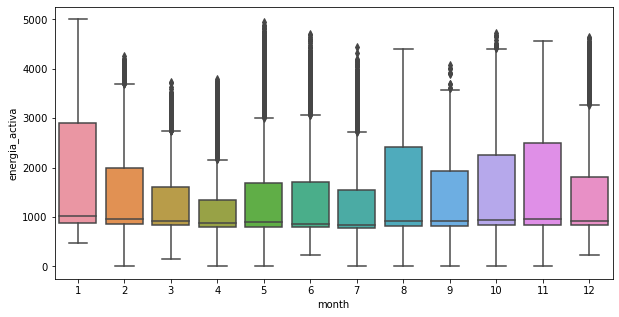

In [60]:
# boxplots by month
fig, axs = plt.subplots(figsize=(10,5))
sns.boxplot(x = 'month', y='energia_activa', data = df_total)

<AxesSubplot:xlabel='month', ylabel='TempCelcius'>

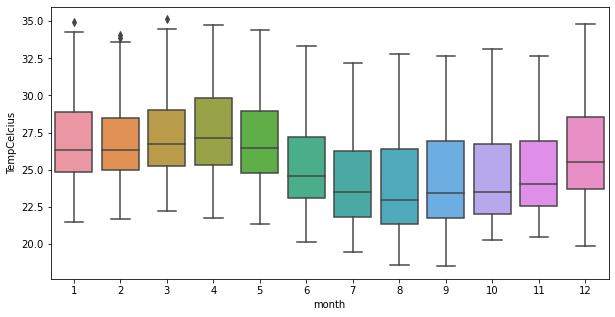

In [61]:
# boxplots by month
fig, axs = plt.subplots(figsize=(10,5))
sns.boxplot(x = 'month', y='TempCelcius', data = df_total)

<AxesSubplot:xlabel='hour', ylabel='HR'>

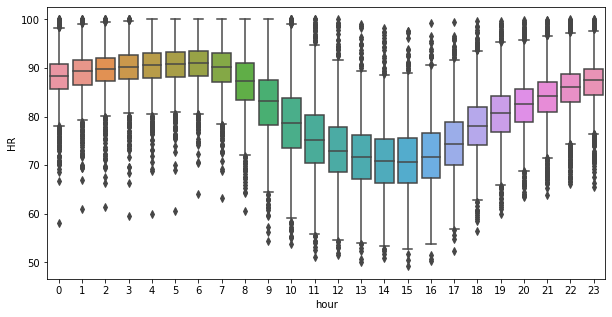

In [62]:
# boxplots by month
fig, axs = plt.subplots(figsize=(10,5))
sns.boxplot(x = 'hour', y='HR', data = df_total)

In [63]:
df_total.head(1)

tiempo  energia_activa  energia_activa_sin_factor  energia_rectiva  \
0 2017-01-01           827.4                      0.197            352.8   

   energia_rectiva_sin_factor  demanda_activa  demanda_reactiva  TempCelcius  \
0                       0.084          3309.6            1411.2    25.881833   

          HR  Lluviamm  Dirdelviento  Veldelviento_m/s  Velderafagas_m/s  \
0  80.133333       0.0         203.1           -888.88           -888.88   

   year  month  day  hour  weekday  
0  2017      1    1     0        6

In [64]:
df_variables_analisis=df_total.loc[:,['tiempo', 'energia_activa', 'energia_activa_sin_factor', 'energia_rectiva', 'energia_rectiva_sin_factor', 'demanda_activa', 'TempCelcius', 'HR', 'Lluviamm' ]]

In [65]:
correlation_mat = df_variables_analisis.corr()

In [66]:
correlation_mat

energia_activa  energia_activa_sin_factor  \
energia_activa                    1.000000                   1.000000   
energia_activa_sin_factor         1.000000                   1.000000   
energia_rectiva                   0.968445                   0.968445   
energia_rectiva_sin_factor        0.968445                   0.968445   
demanda_activa                    1.000000                   1.000000   
TempCelcius                       0.469467                   0.469467   
HR                               -0.427096                  -0.427096   
Lluviamm                         -0.039756                  -0.039756   

                            energia_rectiva  energia_rectiva_sin_factor  \
energia_activa                     0.968445                    0.968445   
energia_activa_sin_factor          0.968445                    0.968445   
energia_rectiva                    1.000000                    1.000000   
energia_rectiva_sin_factor         1.000000                    1.000000   
demanda_activa                     0.968445                    0.968445   
TempCelcius                        0.430183                    0.430183   
HR                                -0.389580                   -0.389580   
Lluviamm                          -0.047610                   -0.047610   

                            demanda_activa  TempCelcius        HR  Lluviamm  
energia_activa                    1.000000     0.469467 -0.427096 -0.039756  
energia_activa_sin_factor         1.000000     0.469467 -0.427096 -0.039756  
energia_rectiva                   0.968445     0.430183 -0.389580 -0.047610  
energia_rectiva_sin_factor        0.968445     0.430183 -0.389580 -0.047610  
demanda_activa                    1.000000     0.469467 -0.427096 -0.039756  
TempCelcius                       0.469467     1.000000 -0.787903 -0.060839  
HR                               -0.427096    -0.787903  1.000000  0.148997  
Lluviamm                         -0.039756    -0.060839  0.148997  1.000000

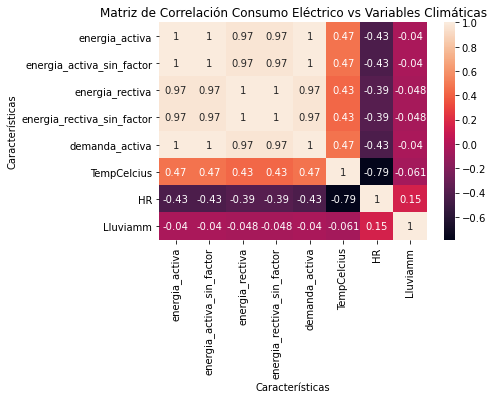

In [67]:
sns.heatmap(correlation_mat, annot = True)
plt.title("Matriz de Correlación Consumo Eléctrico vs Variables Climáticas")
plt.xlabel("Características")
plt.ylabel("Características")
plt.show()

<AxesSubplot:xlabel='TempCelcius', ylabel='energia_activa'>

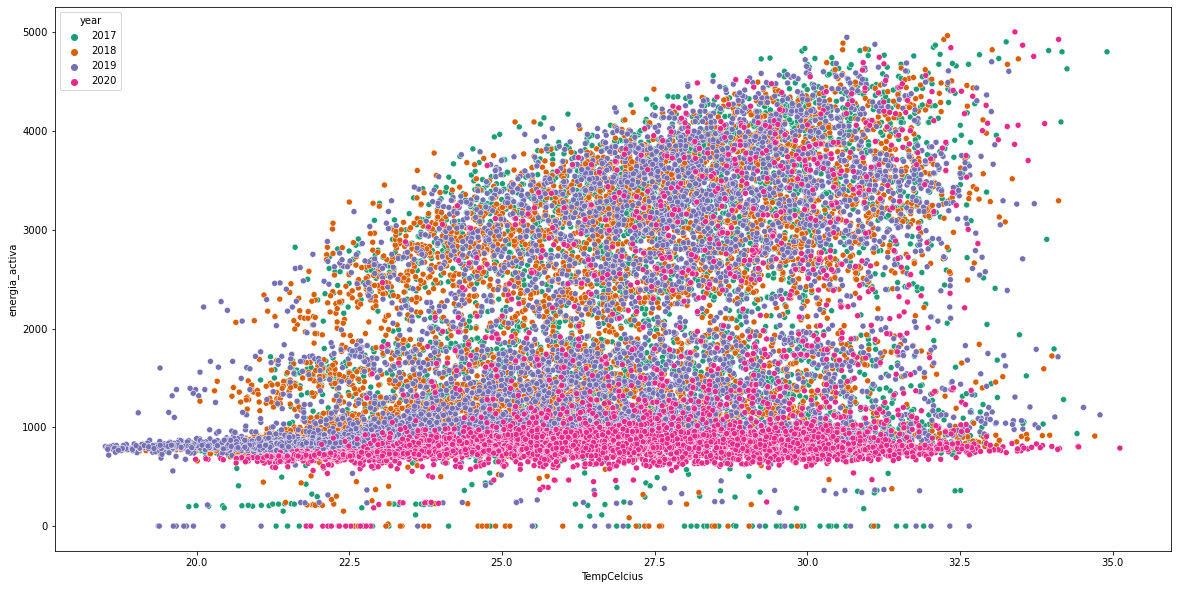

In [68]:
fig, axs = plt.subplots(figsize=(20,10))
sns.scatterplot(y="energia_activa", x='TempCelcius', data=df_total, hue="year", palette="Dark2")

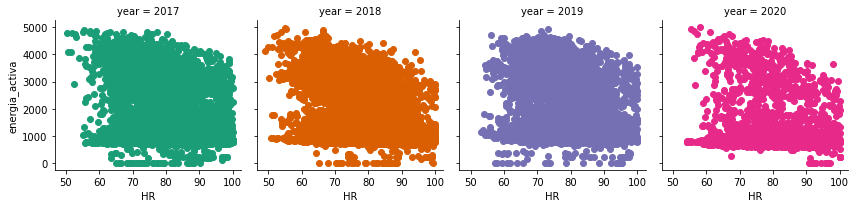

In [69]:
grid = sns.FacetGrid(df_total, col="year", hue="year", palette="Dark2")
grid.map(plt.scatter,'HR','energia_activa')
plt.show()

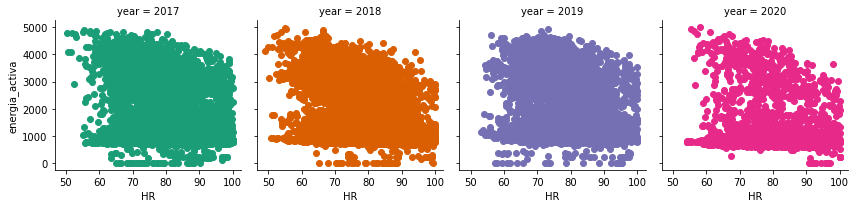

In [70]:
grid = sns.FacetGrid(df_total, col="year", hue="year", palette="Dark2")
grid.map(plt.scatter,'HR','energia_activa')
plt.show()

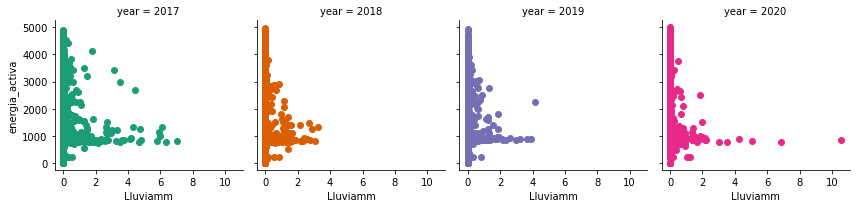

In [71]:
grid = sns.FacetGrid(df_total, col="year", hue="year", palette="Dark2")
grid.map(plt.scatter,'Lluviamm','energia_activa')
plt.show()

In [72]:
tiempo = "hour" # "year" "month" "day" "hour" "weekday"

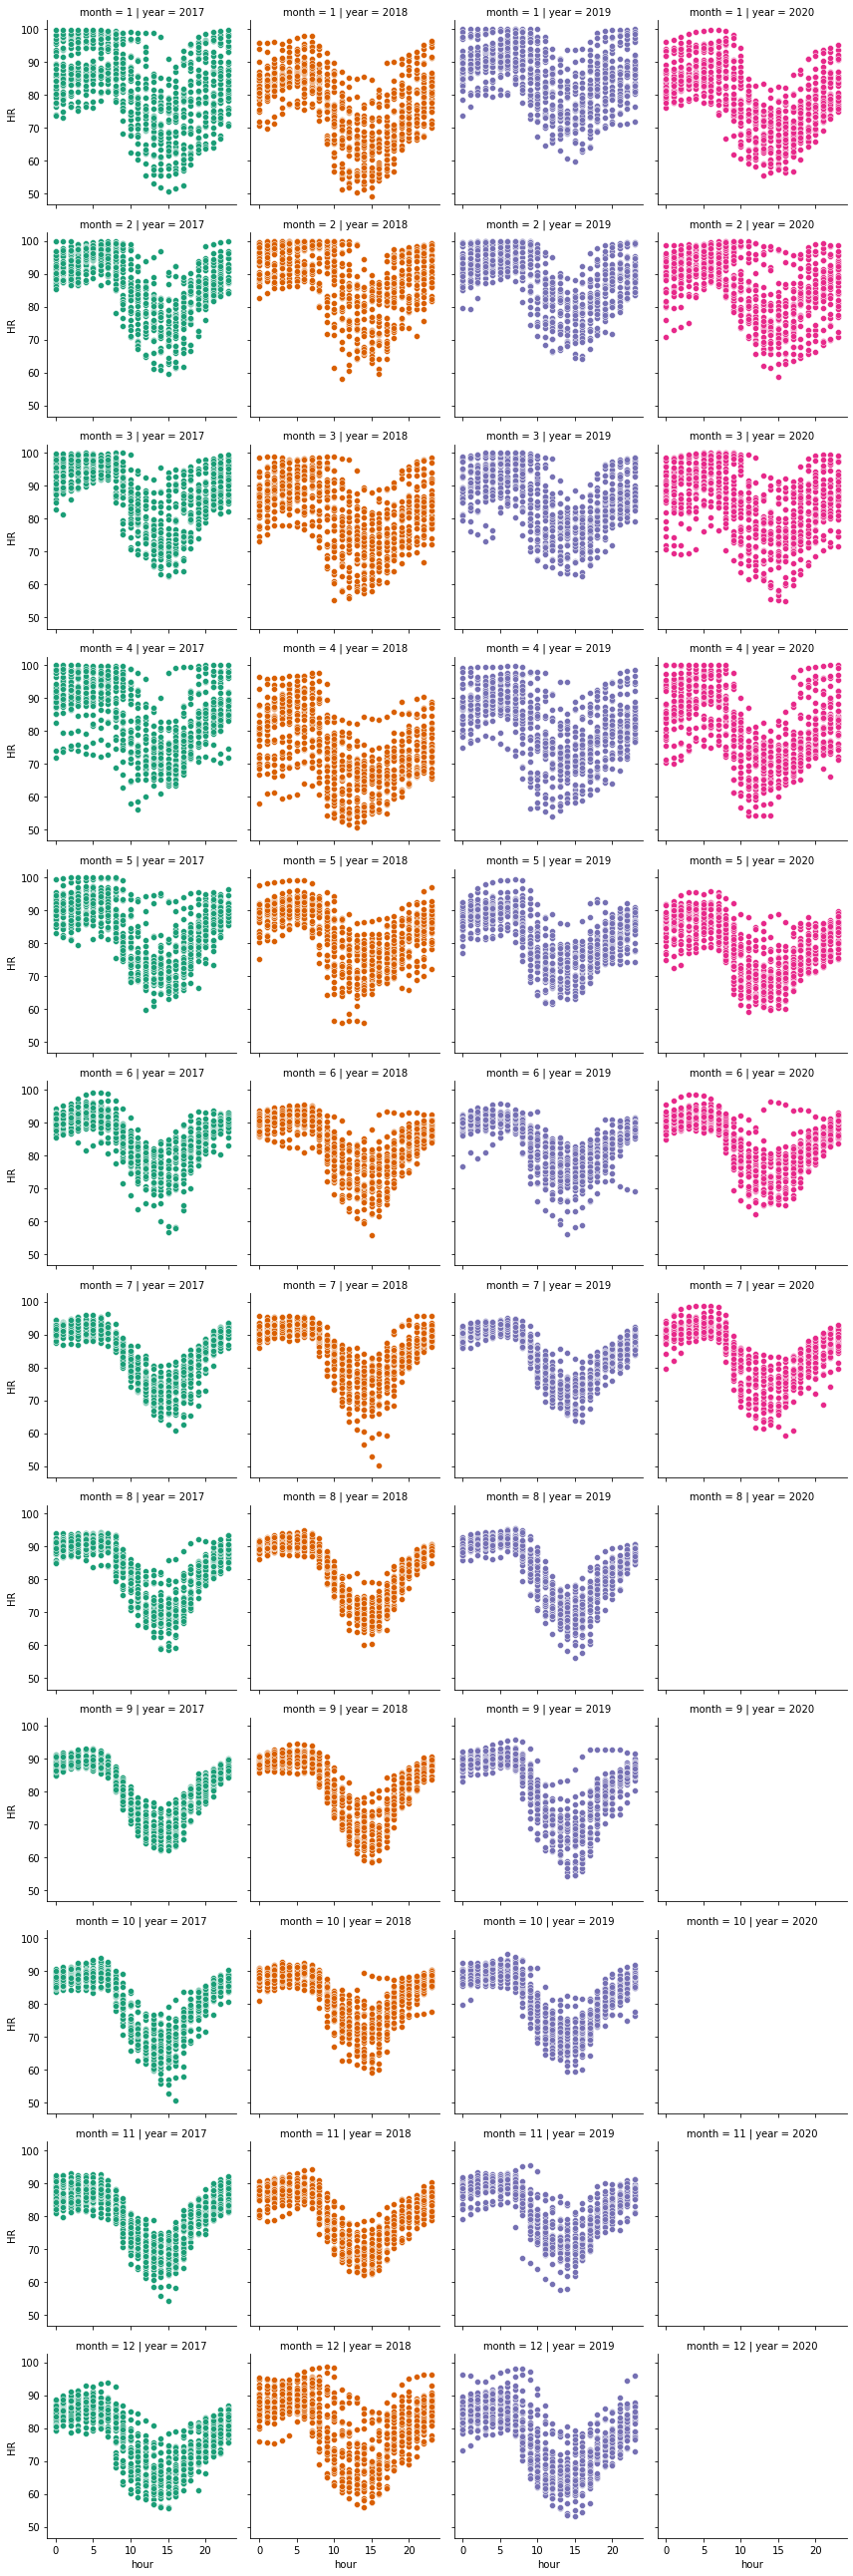

In [73]:
grid = sns.FacetGrid(df_total, col="year", row="month", hue="year", palette="Dark2")
grid.map(sns.scatterplot,tiempo,'HR')
plt.show()

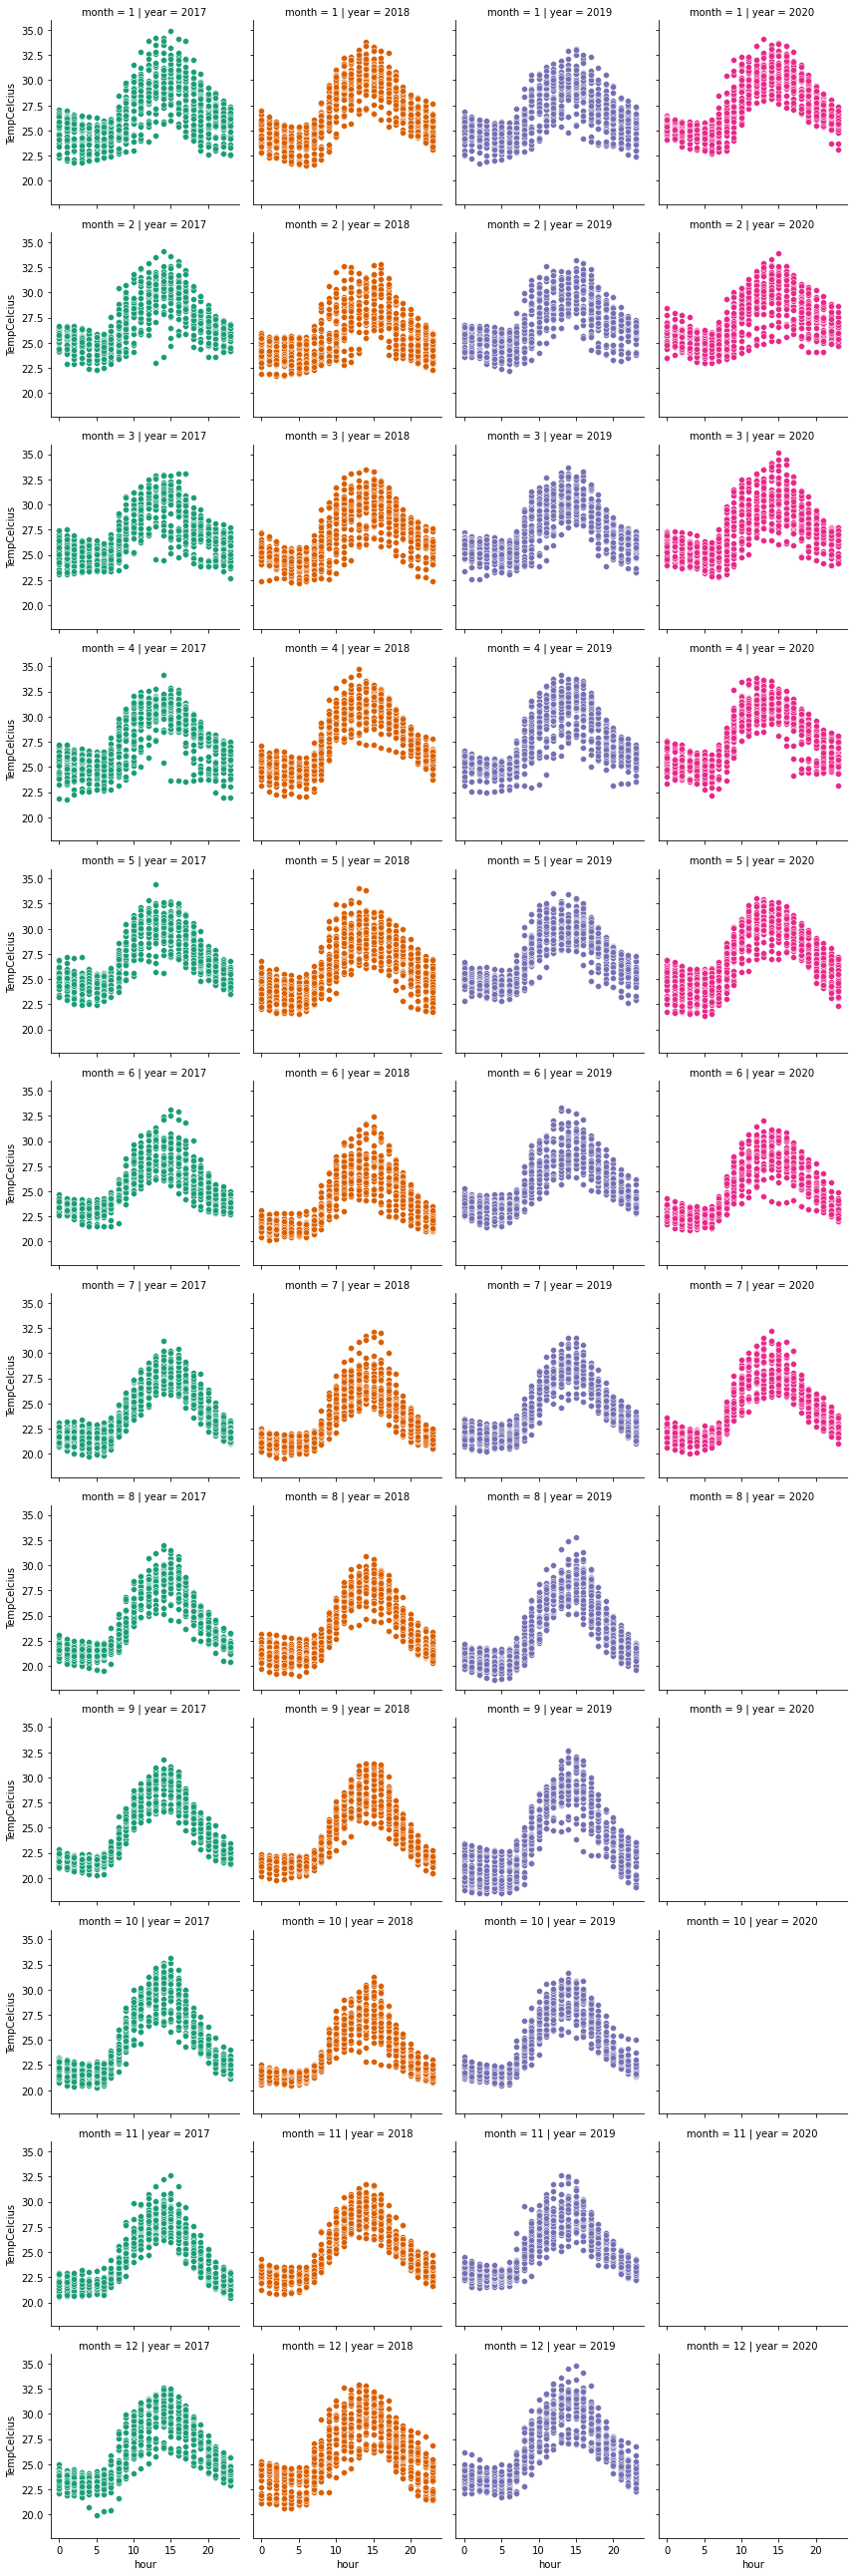

In [74]:
grid = sns.FacetGrid(df_total, col="year", row="month", hue="year", palette="Dark2")
grid.map(sns.scatterplot,tiempo,'TempCelcius')
plt.show()

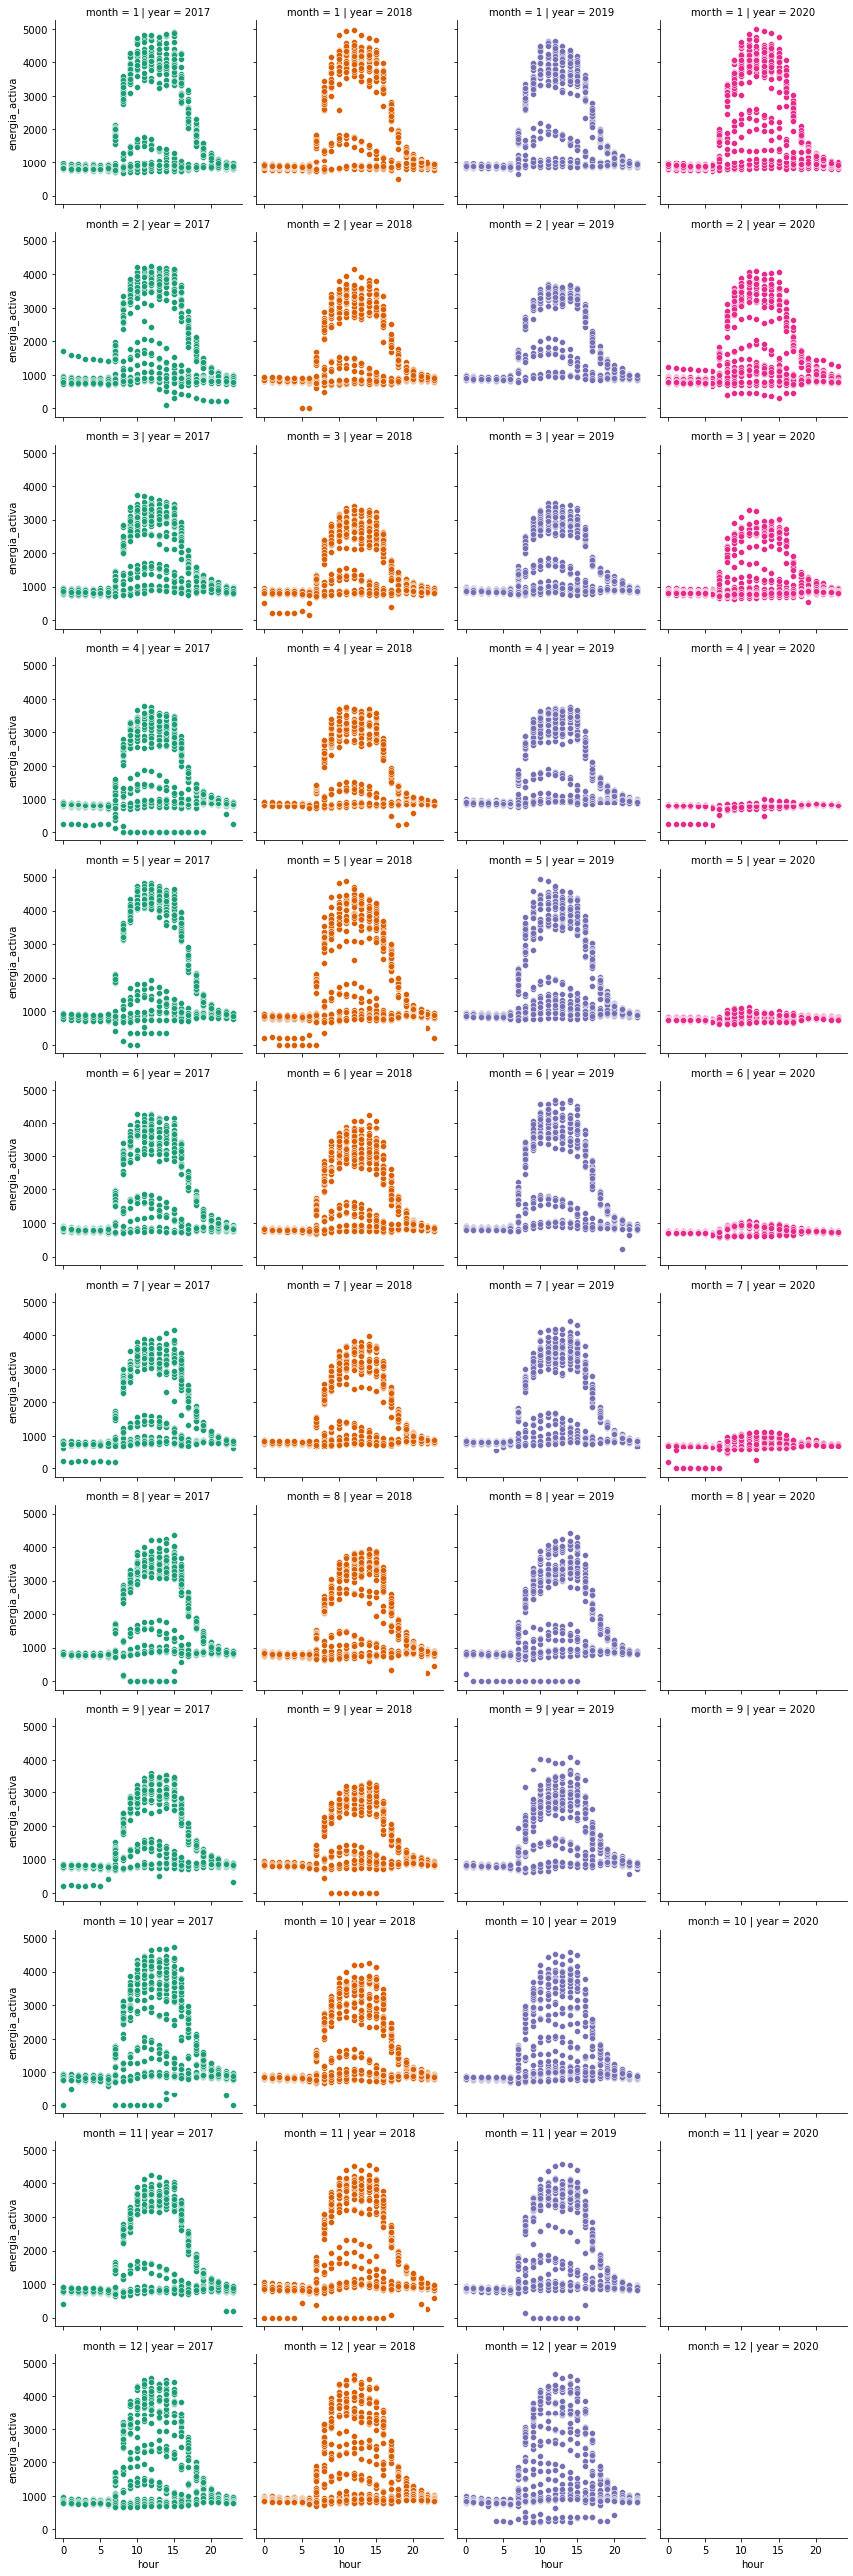

In [75]:
grid = sns.FacetGrid(df_total, col="year", row="month", hue="year", palette="Dark2")
grid.map(sns.scatterplot,tiempo,'energia_activa')
plt.show()

In [76]:
ordered_year = sorted(df_total['year'].unique())

In [77]:
ordered_month = sorted(df_total['month'].unique())

In [78]:
ordered_month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [79]:
ordered_year 

[2017, 2018, 2019, 2020]

In [80]:
ordered_ = sorted(df_total['energia_activa'].unique())

C:\Users\franx\miniconda3\envs\redesneuronales\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


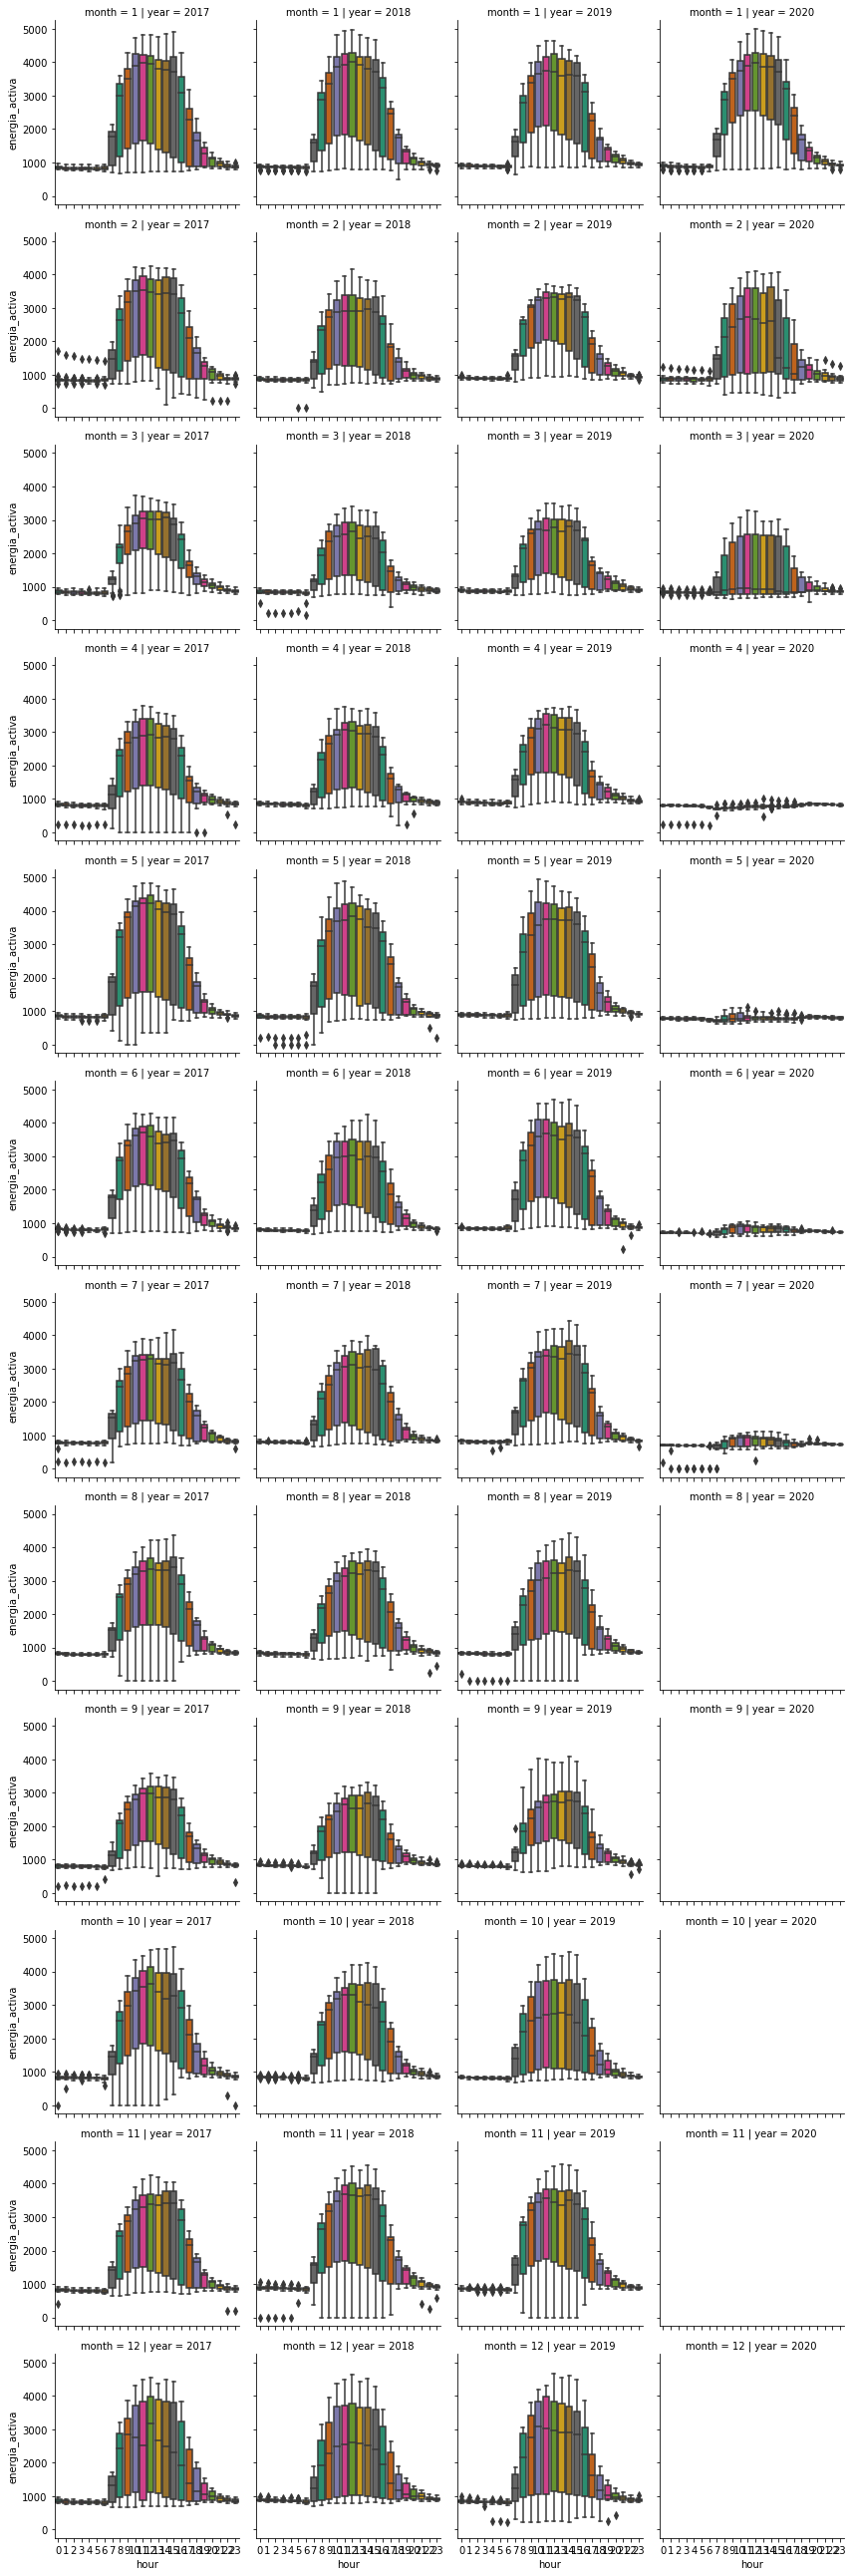

In [81]:
grid = sns.FacetGrid(df_total, col="year", row="month")
grid.map(sns.boxplot,tiempo,'energia_activa', data=df_total,palette="Dark2")
plt.show()

C:\Users\franx\miniconda3\envs\redesneuronales\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


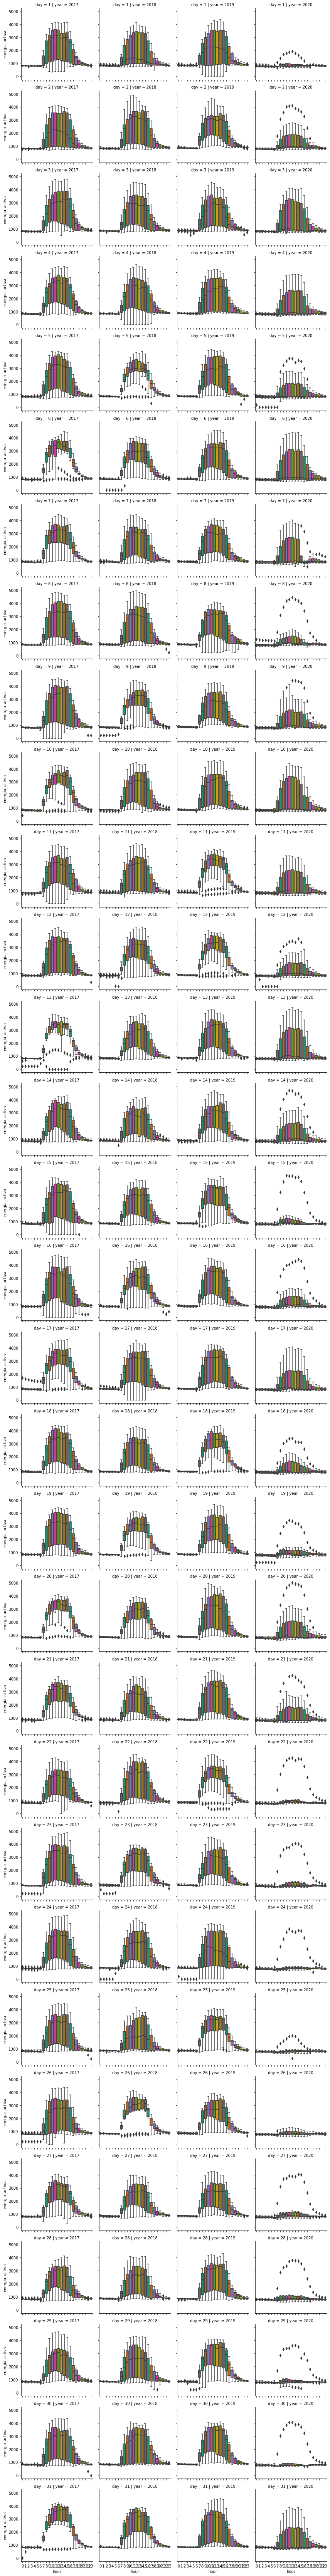

In [82]:
grid = sns.FacetGrid(df_total, col="year", row="day")
grid.map(sns.boxplot,tiempo,'energia_activa', data=df_total,palette="Dark2")
plt.show()

C:\Users\franx\miniconda3\envs\redesneuronales\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


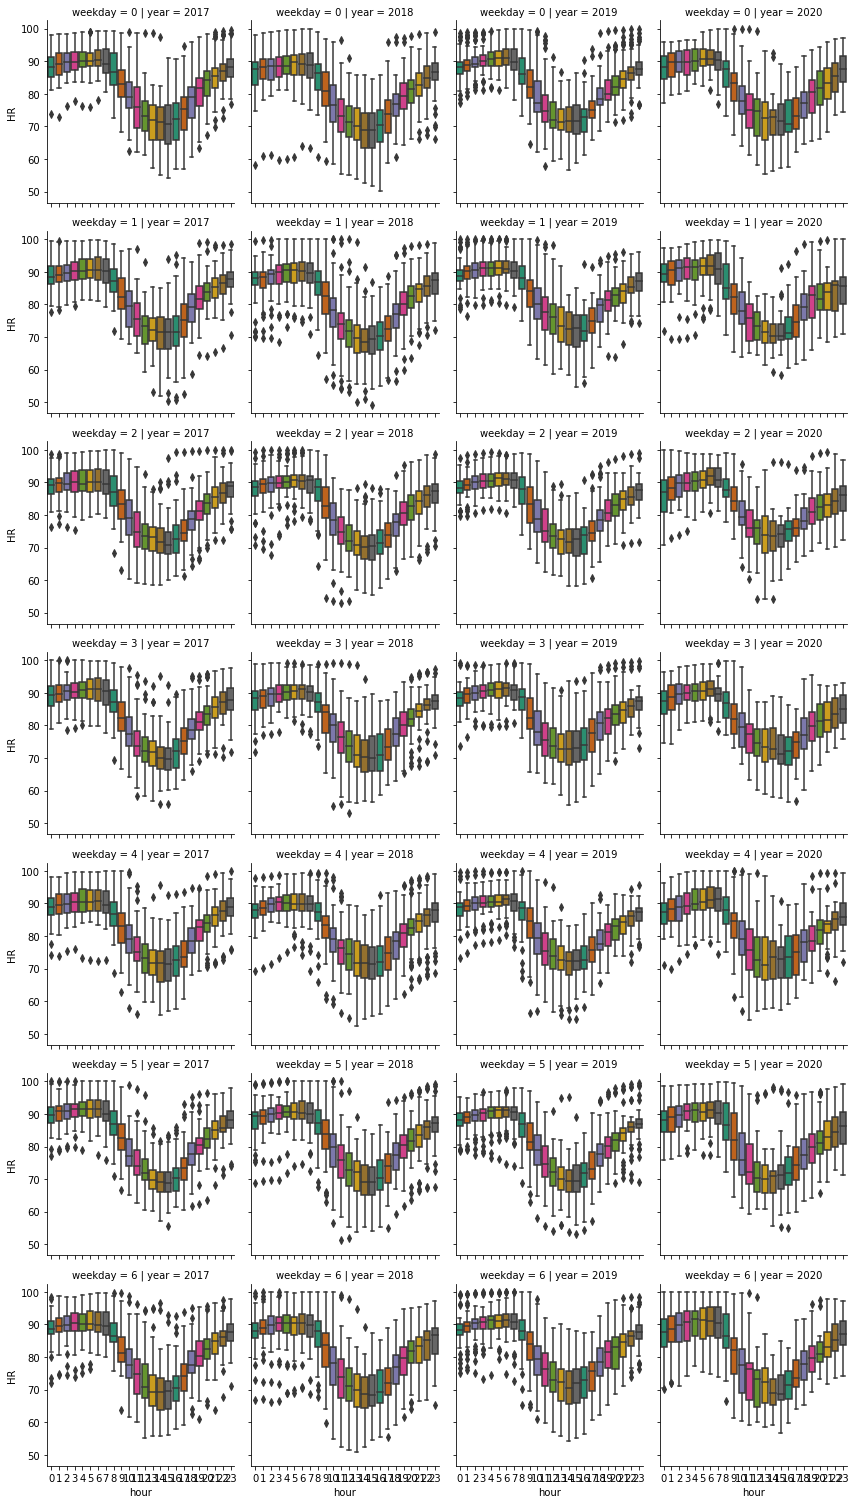

In [83]:
grid = sns.FacetGrid(df_total, col="year", row="weekday")
grid.map(sns.boxplot,tiempo,'HR', data=df_total,palette="Dark2")
plt.show()

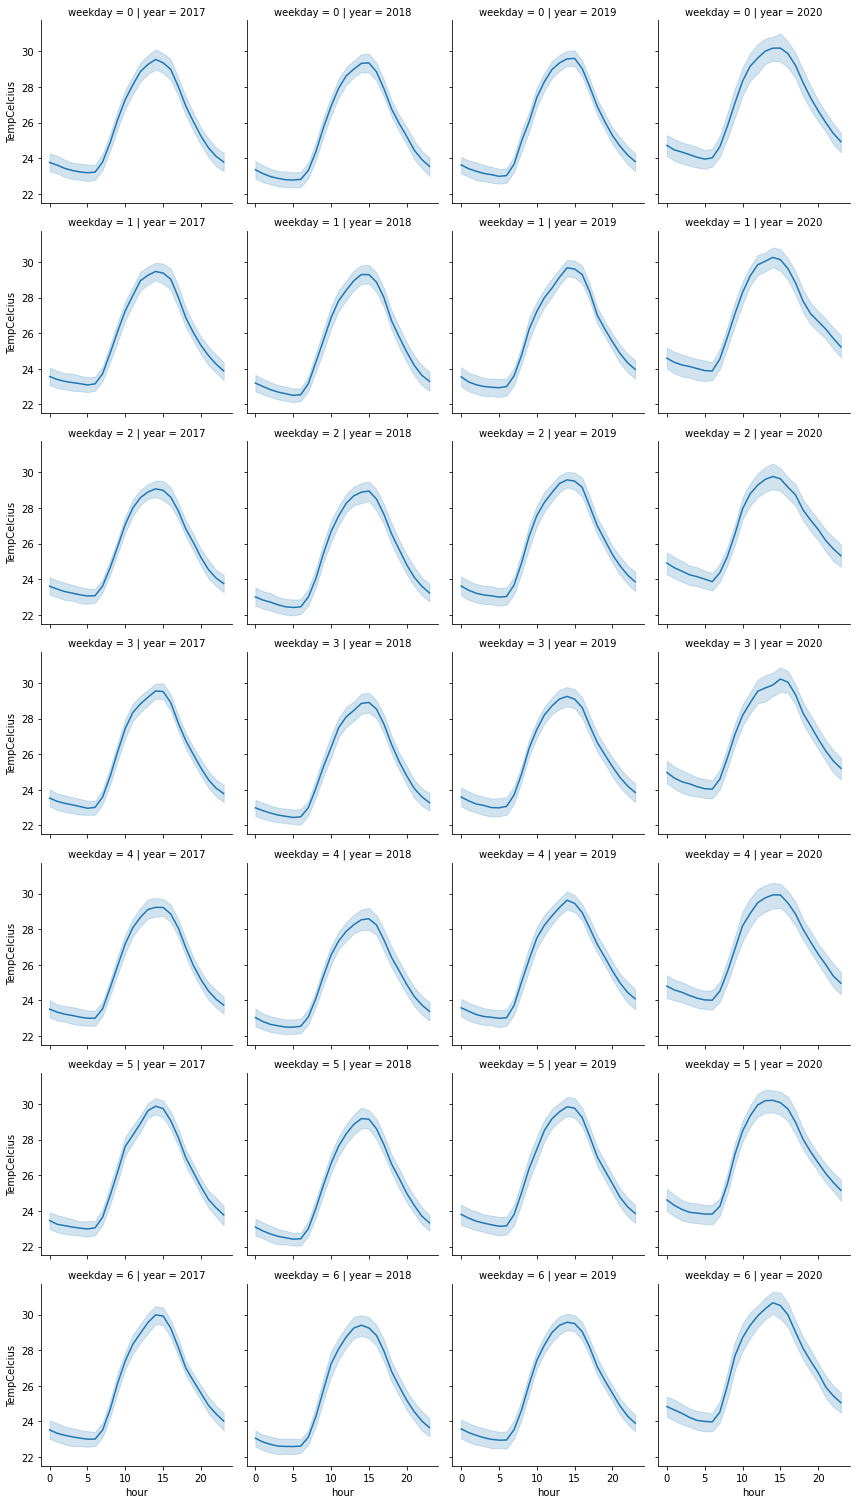

In [84]:
grid = sns.FacetGrid(df_total, col="year", row="weekday")
grid.map(sns.lineplot,tiempo,'TempCelcius', data=df_total,palette="Dark2")
plt.show()

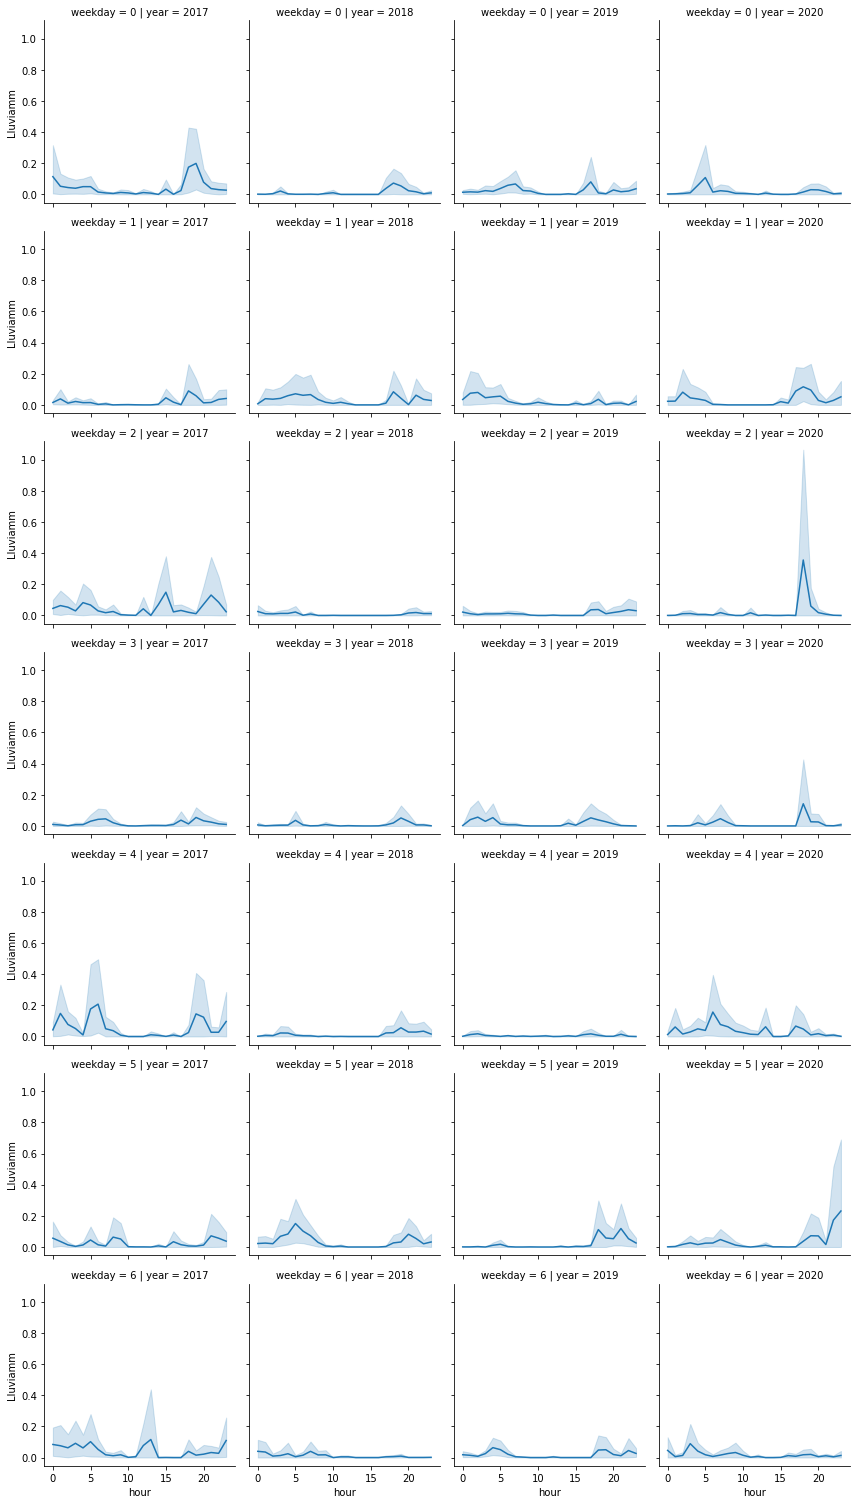

In [85]:
grid = sns.FacetGrid(df_total, col="year", row="weekday")
grid.map(sns.lineplot,tiempo,'Lluviamm', data=df_total,palette="Dark2")
plt.show()

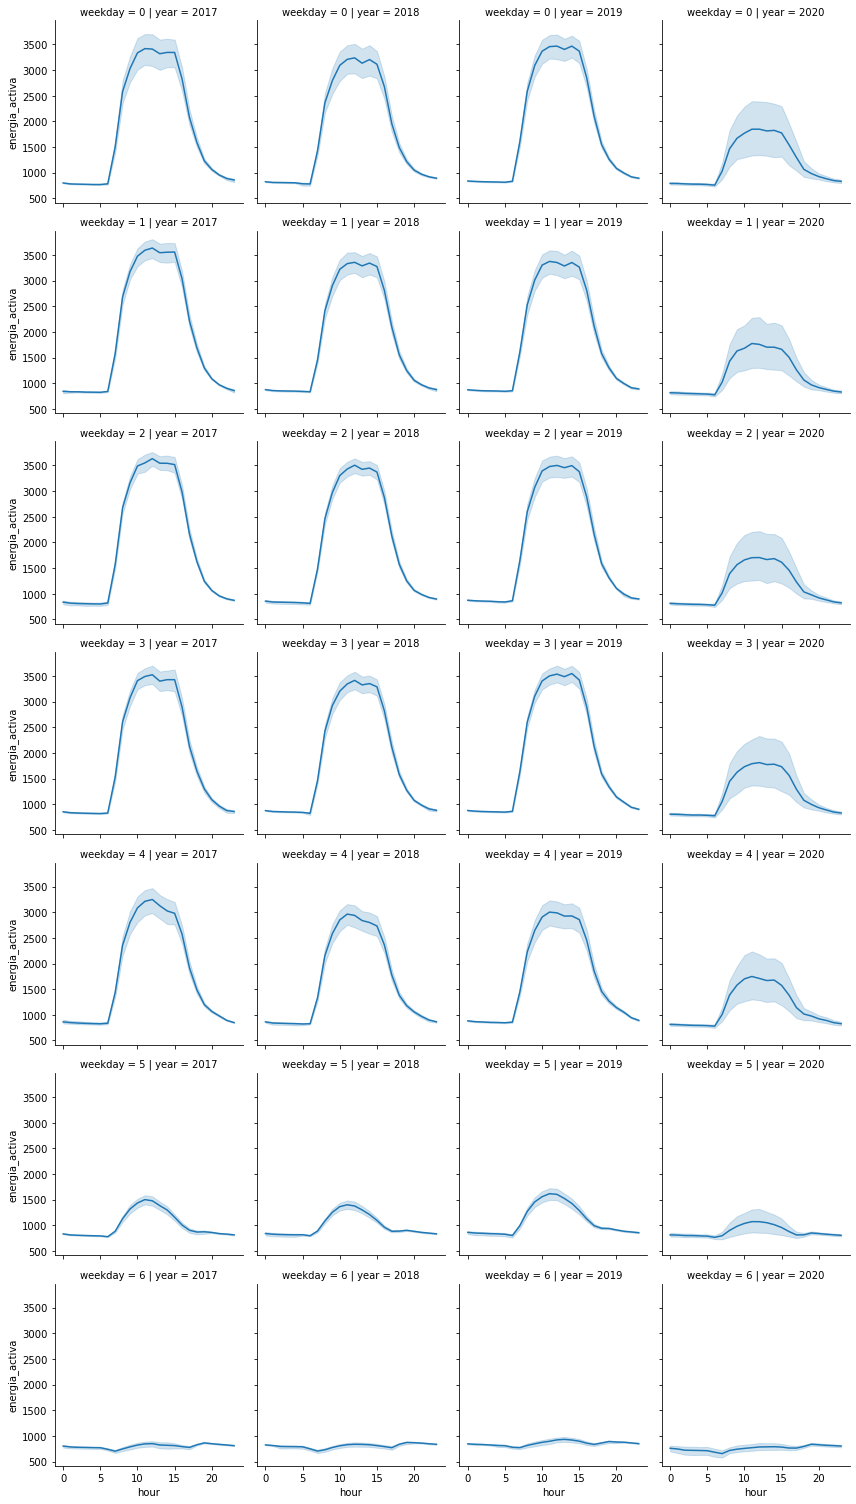

In [86]:
grid = sns.FacetGrid(df_total, col="year", row="weekday")
grid.map(sns.lineplot,tiempo,'energia_activa', data=df_total,palette="Dark2")
plt.show()